In [1]:
from pyuvdata import UVData
from ja import Timer
import numpy as np
from astropy.coordinates import Angle
from astropy import units as u

In [2]:
timer = Timer()

In [18]:
path8098 = '/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/2458098_sliced/'
path8099 = '/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/2458099_sliced/'
lst_range = '010601_011009'

In [21]:
uvd8098 = UVData()
uvd8099 = UVData()

In [22]:
timer.start()
uvd8098.read(path8098+'zen.'+lst_range+'.calibrated.HH.uvfits', read_metadata=True, read_data=False)
timer.stop('Reading')
timer.start()
uvd8099.read(path8099+'zen.'+lst_range+'.calibrated.HH.uvfits', read_metadata=True, read_data=False)
timer.stop('Reading')

Reading 0.23091363906860352 sec
Reading 4.614556789398193 sec


In [23]:
uvd8098.select(bls=[(0,0,'xx')])
uvd8099.select(bls=[(0,0,'xx')])

In [24]:
RA8098 = Angle(np.mean(uvd8098.lst_array)*u.rad)
RA8099 = Angle(np.mean(uvd8099.lst_array)*u.rad)

In [25]:
print(RA8098.deg)
print(RA8099.deg)

17.040367169527023
17.03828704141838


In [34]:
print(uvd8098.phase_center_dec_degrees)
print(uvd8099.phase_center_dec_degrees)
print(np.mean(np.array([uvd8099.phase_center_dec_degrees,uvd8098.phase_center_dec_degrees])))

-30.813185831037597
-30.81313997436559
-30.813162902701592


In [30]:
print((uvd8098.phase_center_dec_degrees-uvd8099.phase_center_dec_degrees)*3600.)

-0.16508401922266103


In [35]:
print(uvd8098.phase_center_ra_degrees)
print(uvd8099.phase_center_ra_degrees)
print(np.mean(np.array([uvd8099.phase_center_ra_degrees,uvd8098.phase_center_ra_degrees])))

16.33474067152961
16.33273412502541
16.33373739827751


In [29]:
print((uvd8098.phase_center_ra_degrees-uvd8099.phase_center_ra_degrees)*3600.)

7.2235674151130524


tclean(vis=vis8098,imagename=im8098,niter=0, weighting='briggs', robust=0,imsize = [512,512], pbcor=False, cell=['500 arcsec'], specmode='mfs', nterms=1, spw='0:100~920',stokes='IQUV', interactive=False, pblimit=-1,phasecenter='ICRS 16.33374deg -30.81316deg')

In [36]:
from pixell import enmap, utils
from pixell import reproject
from pixell import enplot

In [41]:
file8098='/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/2458098_sliced/zen.010601_011009.calibrated.HH.dirty.image.fits'
file8099='/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/2458099_sliced/zen.010601_011009.calibrated.HH.dirty.image.fits'

In [42]:
m8098 = enmap.read_map(file8098,)
m8099 = enmap.read_map(file8099,)

In [43]:
# Convenient wrapper for displaying enmaps
def eshow(x,**kwargs): enplot.show(enplot.plot(x,**kwargs))

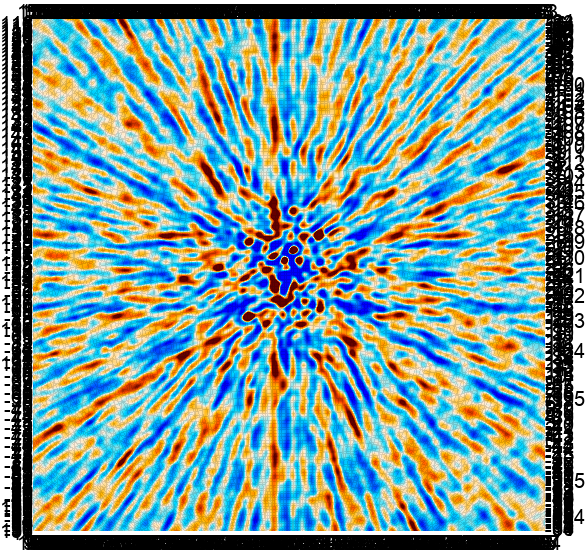

In [45]:
eshow(m8098[0,0,:,:])

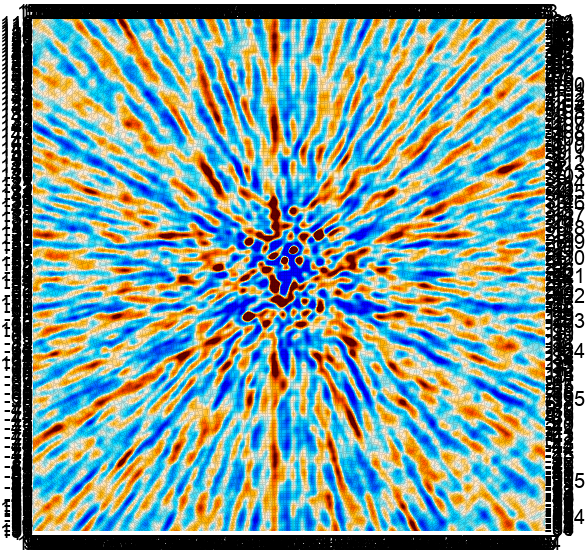

In [46]:
eshow(m8099[0,0,:,:])

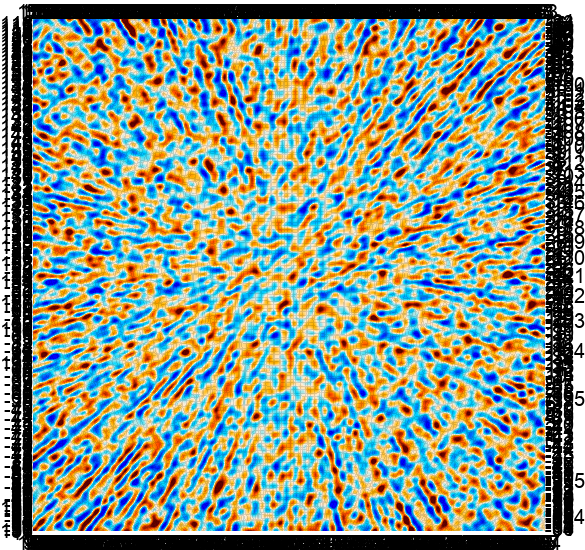

In [47]:
eshow(m8098[0,0,:,:]-m8099[0,0,:,:])

In [48]:
diff = m8098-m8099

In [49]:
enmap.write_fits('diff.fits', diff)

In [50]:
pwd

'/lustre/aoc/projects/hera/jaguirre/gitrepos/plimpy/PolarizedMosaics'